In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3



# SQLite to Store Financial Analysis on the local drive


<!-- PELICAN_BEGIN_SUMMARY -->

After merging and reshaping the datasets, we can use SQLite to safely storing, organizing and manipulating data in smaller environments.
SQLite is a flexible database can do real work in real business environments. 
This database tool can be useful for accountants to fo financial analysis.


<!-- PELICAN_END_SUMMARY -->

from book "Using SQLite by Jay A. Kreibich"

what is SQLite: In the simplest terms, SQLite is a public-domain software package that provides a
relational database management system, or RDBMS. Relational database systems are
used to store user-defined records in large tables. In addition to data storage and management, a database engine can process complex query commands that combine data
from multiple tables to generate reports and data summaries. Other popular RDBMS
products include Oracle Database, IBM’s DB2, and Microsoft’s SQL Server on the
commercial side, with MySQL and PostgreSQL being popular open source products.
The “Lite” in SQLite does not refer to its capabilities. Rather, SQLite is lightweight
when it comes to setup complexity, administrative overhead, and resource usage

## What is DB Brower for SQLite
DB Browser for SQLite is a high quality, visual, open source tool to create, design, and edit database files compatible with SQLite.

It is for users and developers wanting to create databases, search, and edit data. It uses a familiar spreadsheet-like interface,
and you don't need to learn complicated SQL commands.

This program is not a visual shell for the sqlite command line tool.



## Why use SQLite to read Excel File?
- Sort data on several fields
- Combining data from several sheets 
- Install Scientific Python to convert Excel file in SQLite database in just 8 lines of code
- Use free GUI tools to run SQL queries on database
- Each sheet of Excel file is converted in a table
- Sheet name can use underscore, but no whitespace for legal SQLite table name
- The first row in each sheet should have legal column names. Here is conversion code:



In [12]:
#Name of Excel xlsx file. SQLite database will have the same name and extension .db
#Connect SQlite file
filename="../extra/PremiumLossSQLite" 
con=sqlite3.connect(filename+".db")  

wb=pd.read_excel(filename+'.xlsx',sheet_name=None)
for sheet in wb:
#     wb[sheet].to_sql(sheet,con, index=False)
    wb[sheet].to_sql(sheet,con, index=False, if_exists='replace')
con.commit()
#con.close()

## A handy tool to visualize and access SQLite databases is the free DB Brower
### I will use this tool to provide screenshots of the database structures that we created below the corresponding code sections

<img src="/images/DBimage.PNG" alt="[img: DB Browser after import Excel to SQLite and view the table]" title="DbBrowser Query" />


In [16]:
# now lets take a query that we think should get the inner join data between the reinsurance, premium and loss data and export the data to ??

sql_statement='''
select r.PolicyNumber as rp, p.PolicyNumber as pp, l.PolicyNumber as lp
from reinsurance as r
join premium as p on p.PolicyNumber=r.PolicyNumber
join loss as l on l.PolicyNumber=r.PolicyNumber
'''

df = pd.read_sql(sql_statement,con)

df.to_excel('../extra/reinsurace_query_results.xlsx')


# Save the query result as an Excel file

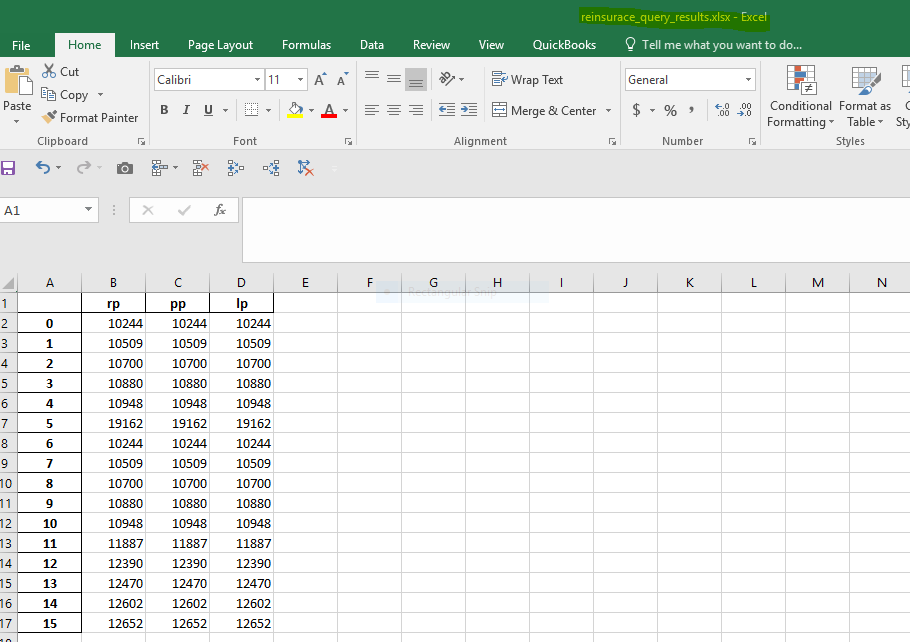


In [17]:
con.close()